In [1]:
%matplotlib widget
import sys
import numpy as np
import scipy.stats
import scipy.stats.qmc
import matplotlib.pyplot as plt
import matplotlib

sys.path.append("/usr/wrk/people9/sima9999/code/")
sys.path.append("/vegas/users/staff/womo1998/Projects/2019_OMA_UQ/code/")
from helpers import get_pcd

In [2]:
X1 = scipy.stats.norm(3,1)
X21 = scipy.stats.norm(4,2)
X22 = scipy.stats.norm(6,1)
support = np.array([[0,6],[0,10]])

In [3]:
N = 100
engine = scipy.stats.qmc.Halton(2,scramble=True)
ld_samps = engine.random(N)
ld_samps = scipy.stats.qmc.scale(ld_samps, support[:,0],support[:,1],)
pr_samps1 = np.array([var.rvs(N) for var in [X1, X21]]).T
pr_samps2 = np.array([var.rvs(N) for var in [X1, X22]]).T

In [4]:
def mapping(x1,x2):
    print(x1.shape, x2.shape)
    return np.sin(x1*2/3*np.pi/support[0,1])*x2

ypr1 = mapping(pr_samps1[:,0],pr_samps1[:,1])
ypr2 = mapping(pr_samps2[:,0],pr_samps2[:,1])
y = mapping(ld_samps[:,0], ld_samps[:,1])

(100,) (100,)
(100,) (100,)
(100,) (100,)


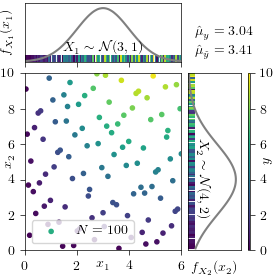

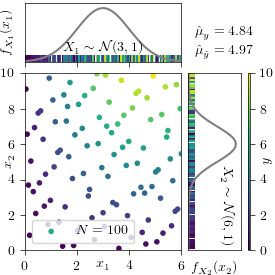

In [10]:
X2 = X21
# X2 = X22
ypr = [ypr1, ypr2]
for i,X2 in enumerate([X21,X22]):
    with matplotlib.rc_context(get_pcd('print')):
        fig, axes = plt.subplots(2,3, gridspec_kw = {'width_ratios':(3,1,0.05),'height_ratios':(1,3)}, sharex='col',figsize=(2.75,2.75))
        fig.subplots_adjust(hspace=0.1, wspace=0.1)

        
        # y -= y.min()
        # y/=y.max()

        axes[0,0].scatter(ld_samps[:,0], np.zeros_like(ld_samps[:,0])+0.05,marker='|', c=y, cmap='viridis')
        x1 = ld_samps[:,0]#np.linspace(*support[0,:])
        pdf1 = X1.pdf(x1)
        sort_ind1 = x1.argsort()
        pdf1 /= pdf1.max()
        axes[0,0].plot(x1[sort_ind1], pdf1[sort_ind1], c='grey')
        axes[0,0].set_yticks([])
        axes[0,0].set_ylim((0,1.1))
        axes[0,0].set_ylabel('$f_{X_1}(x_1)$')
        axes[0,0].annotate('$X_1\sim\mathcal{N}(3,1)$',(0.5,0.25), xycoords='axes fraction',ha='center',va='center')

        axes[1,1].scatter(np.zeros_like(ld_samps[:,1])+0.05, ld_samps[:,1], c=y, cmap='viridis', marker='_',)
        x2 = ld_samps[:,1]#np.linspace(*support[1,:])
        pdf2 = X2.pdf(x2)
        pdf2 /= pdf2.max()
        sort_ind2 = x2.argsort()
        axes[1,1].plot(pdf2[sort_ind2],x2[sort_ind2], c='grey')
        axes[1,1].set_ylim(*support[1,:])
        axes[1,1].set_xlim((0,1.1))
        axes[1,1].set_yticks([])
        axes[1,1].set_xticks([])
        axes[1,1].set_xlabel('$f_{X_2}(x_2)$')
        if i==0: axes[1,1].annotate('$X_2\sim\mathcal{N}(4,2)$',(0.3,0.4), xycoords='axes fraction', rotation=-90,ha='center',va='center')
        else: axes[1,1].annotate('$X_2\sim\mathcal{N}(6,1)$',(0.75,0.25), xycoords='axes fraction', rotation=-90,ha='center',va='center')

        weights = pdf1*pdf2
        # weights/=weights.max()

        mappable = axes[1,0].scatter(ld_samps[:,0], ld_samps[:,1], c=y, marker='.', cmap='viridis', label='$N=100$')
        # axes[1,0].scatter(ld_samps[:,0], ld_samps[:,1], c=weights, marker='.')
        axes[0,1].remove()
        axes[0,2].remove()
        axes[1,0].set_xlim(*support[0,:])
        axes[1,0].set_ylim(*support[1,:])
        axes[1,0].set_xticks([0,2,4,6])
        axes[1,0].set_ylabel('$x_2$', labelpad=-10)
        axes[1,0].set_xlabel('$x_1$', labelpad=-10)
        axes[1,0].legend(loc='lower left')

        cbar = fig.colorbar(mappable, cax=axes[1,2])
        cbar.set_label(label='$y$', labelpad=-10)
        mappable.set_clim((0,10))
        plt.subplots_adjust(top=0.99, bottom=0.09, left=0.09, right=0.91, wspace=0.1, hspace=0.1)
        plt.annotate(f'$\hat{{\mu}}_{{\\tilde{{y}}}} = {np.average(y,weights=weights):1.2f}$',(0.71,0.8), xycoords='figure fraction')
        plt.annotate(f'$\hat{{\mu}}_y = {np.average(ypr[i]):1.2f}$',(0.71,0.87), xycoords='figure fraction')
        # fig.savefig(f'/usr/scratch4/sima9999/home/2019_OMA_UQ/pres/figures/uncertainties/qmc_example_{i}.png')
        # fig.savefig(f'/usr/scratch4/sima9999/home/2019_OMA_UQ/pres/figures/uncertainties/qmc_example_{i}.pdf')

In [ ]:
plt.subplots_adjust(top=0.99, bottom=0.09, left=0.09, right=0.91, wspace=0.1, hspace=0.1)

NameError: name 'ypr' is not defined

(100,) (100,)
(100,) (100,)


(-30.44035127109165, -29.79834088581172, -12.696280891052618)

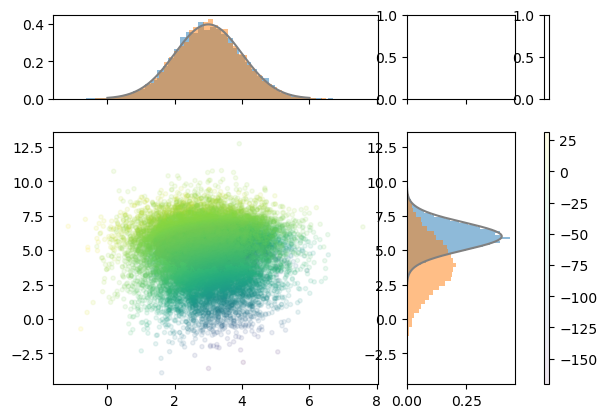

In [205]:
fig, axes = plt.subplots(2,3, gridspec_kw = {'width_ratios':(3,1,0.05),'height_ratios':(1,3)}, sharex='col',)
axes[0,0].hist(pr_samps2[:,0], bins=50, alpha=0.5, density=True)
axes[1,1].hist(pr_samps2[:,1], orientation='horizontal', bins=50, alpha=0.5, density=True)
mappable = axes[1,0].scatter(pr_samps2[:,0], pr_samps2[:,1], c=ypr2, marker='.', cmap='viridis', alpha=0.1)
axes[0,0].hist(pr_samps1[:,0], bins=50, alpha=0.5, density=True)
axes[1,1].hist(pr_samps1[:,1], orientation='horizontal', bins=50, alpha=0.5, density=True)
mappable = axes[1,0].scatter(pr_samps1[:,0], pr_samps1[:,1], c=ypr1, marker='.', cmap='viridis', alpha=0.1)
axes[0,0].plot(x1[sort_ind1], pdf1[sort_ind1], c='grey')
axes[1,1].plot(pdf2[sort_ind2],x2[sort_ind2], c='grey')
# axes[1,0].set_xlim(*support[0,:])
# axes[1,0].set_ylim(*support[1,:])
# axes[1,1].set_ylim(*support[1,:])
cbar = fig.colorbar(mappable, cax=axes[1,2])

In [163]:
pr_samps1.shape, ld_samps.shape

((10000, 2), (10000, 2))